In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

print(f"Project root: {project_root}")
print(f"sys.path: {sys.path}")


import machine_learning.visualisation_lib as VL

Project root: /Users/gsk/documents/neuron/lie-detector-ai
sys.path: ['/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/gsk/documents/neuron/lie-detector-ai/myenv/lib/python3.12/site-packages', '/opt/homebrew/opt/python-tk@3.12/libexec', '/Users/gsk/documents/neuron/lie-detector-ai', '/Users/gsk/documents/neuron/lie-detector-ai', '/Users/gsk/documents/neuron/lie-detector-ai']


In [3]:
import json

def read_json_files(directory):
    results = []
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            filepath = os.path.join(directory, filename)
            with open(filepath, 'r') as file:
                data = json.load(file)
                results.append(data)
    return results

In [4]:
attempt_1 = read_json_files('attempt_1')

In [5]:
attempt_1

[{'best_params': {'model__C': 10,
   'model__gamma': 0.01,
   'model__kernel': 'rbf'},
  'best_score_cv': 0.5900660031508091,
  'test_score': 0.6140939597315436,
  'cv_results': {'mean_fit_time': [8.231644535064698,
    8.160877990722657,
    7.562486839294434,
    7.638537311553955,
    7.441059207916259,
    7.998492336273193,
    7.593310213088989,
    8.253763055801391,
    12.480999755859376,
    7.426358604431153,
    12.177837467193603,
    6.618741893768311,
    12.09479923248291,
    6.43612904548645,
    11.878585004806519,
    6.303607416152954,
    50.254760932922366,
    5.064013528823852,
    53.45405097007752,
    4.834872484207153,
    64.62008390426635,
    4.794925403594971,
    69.70245146751404,
    5.626250410079956,
    97.49614520072937,
    5.083147859573364,
    99.9363821029663,
    6.055661392211914,
    106.91143369674683,
    5.518081855773926,
    85.03018980026245,
    5.527494287490844],
   'std_fit_time': [0.17319670004183427,
    0.4181832701058048,
  

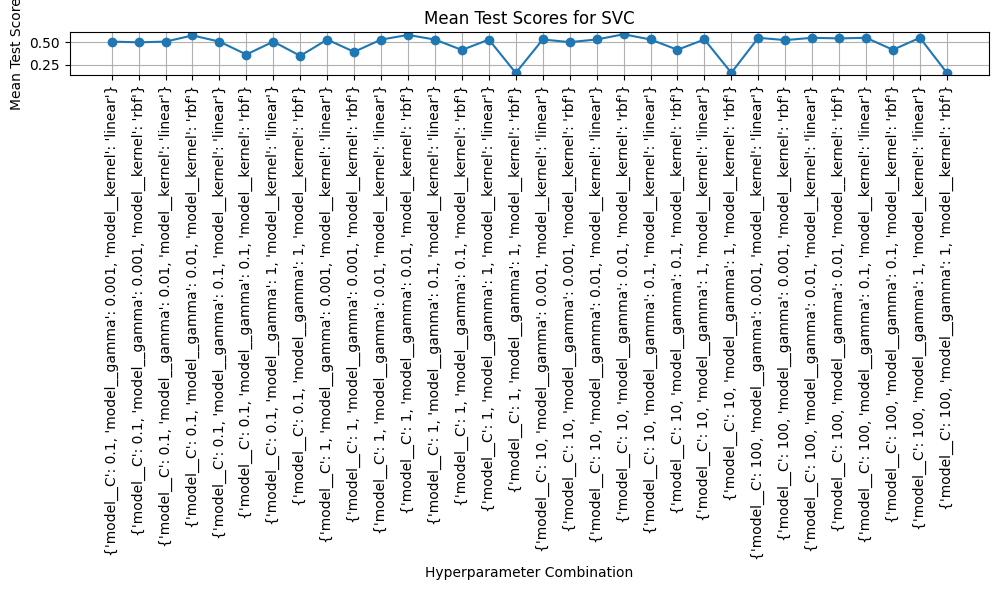

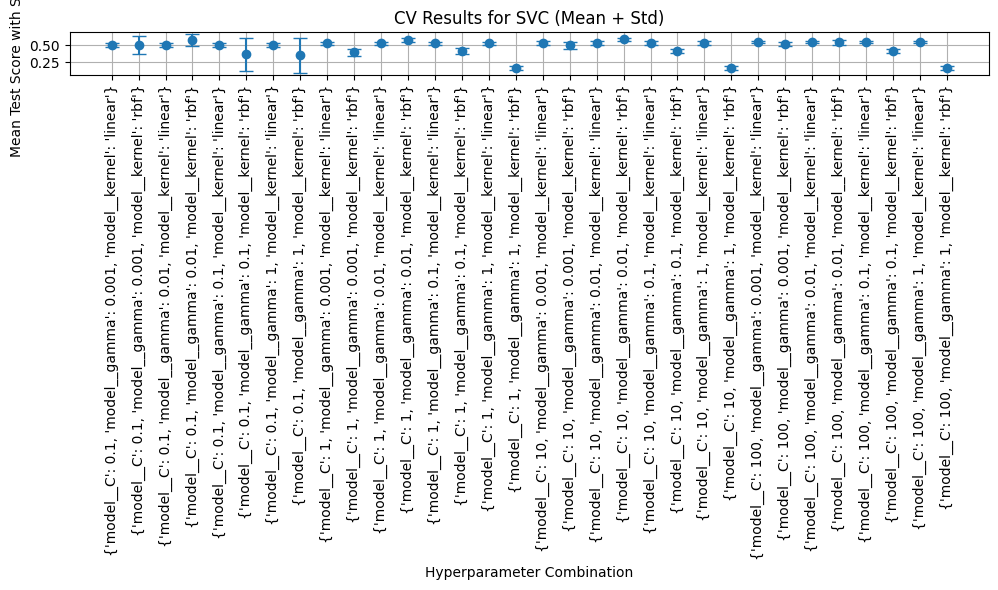

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


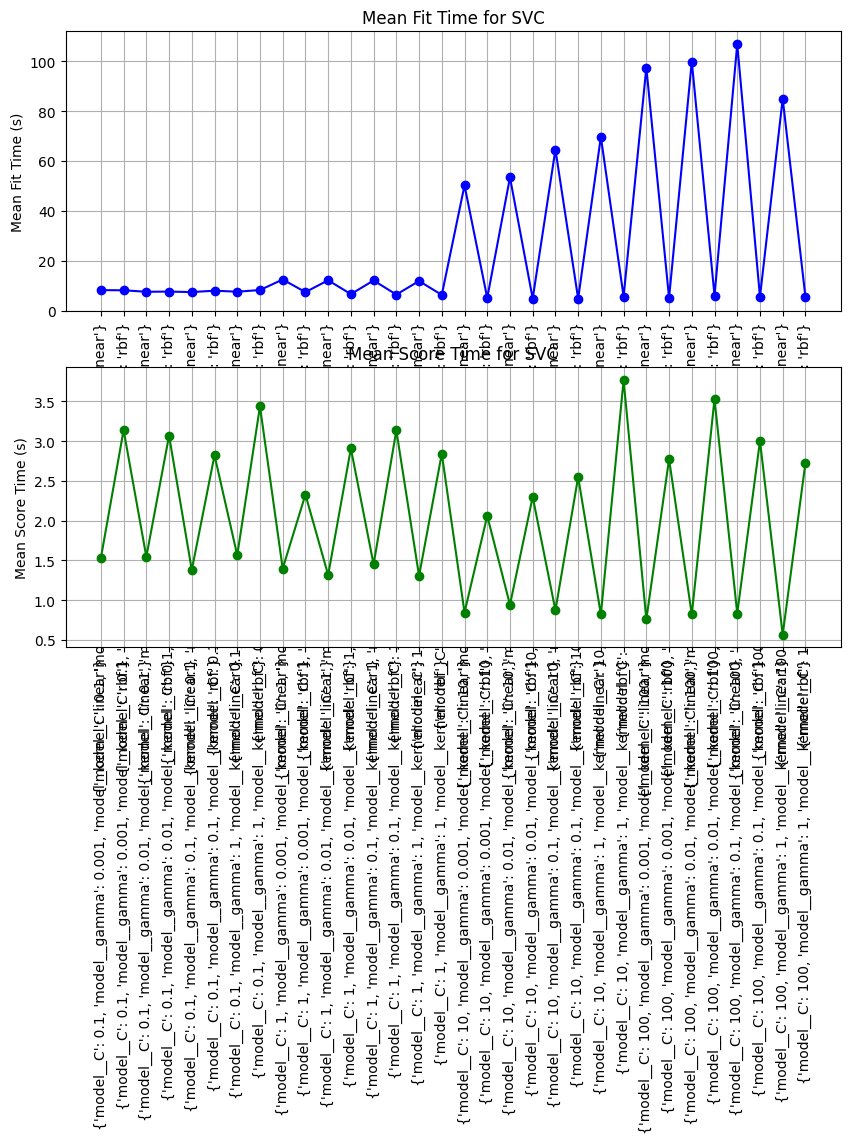

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


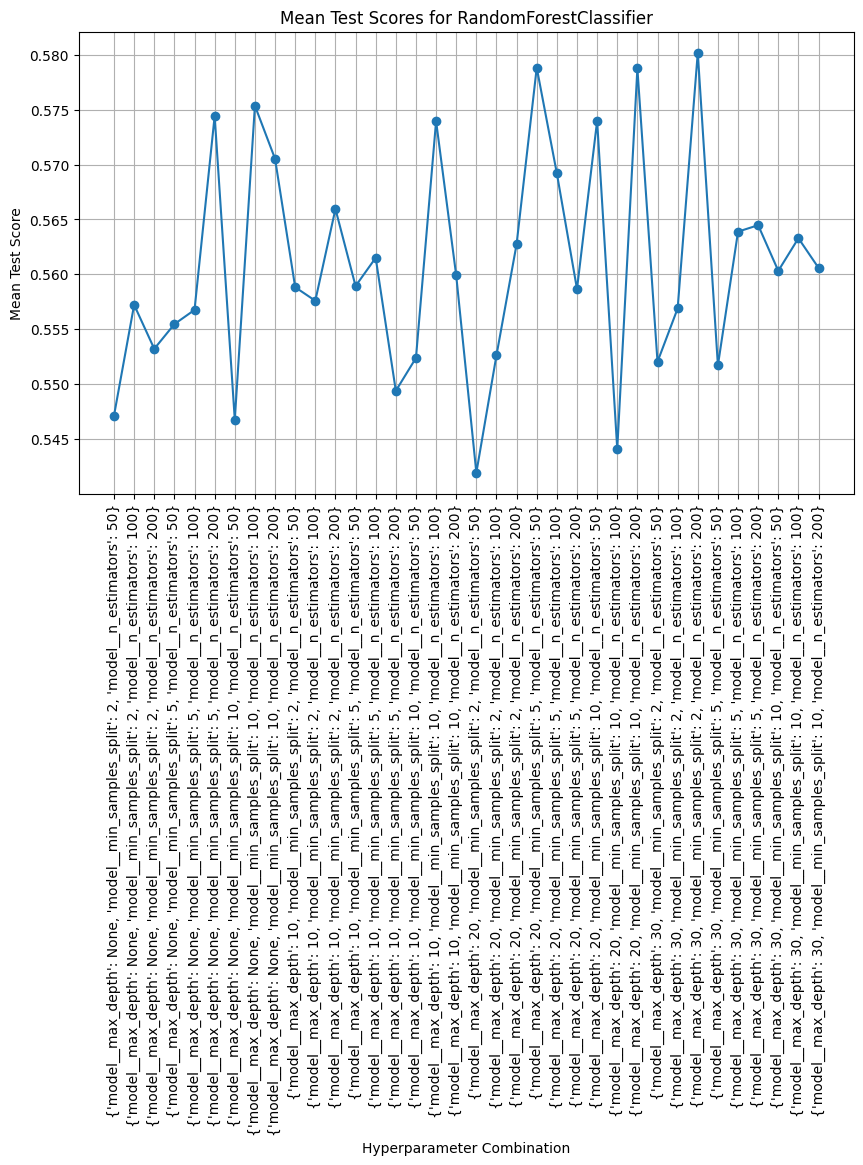

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


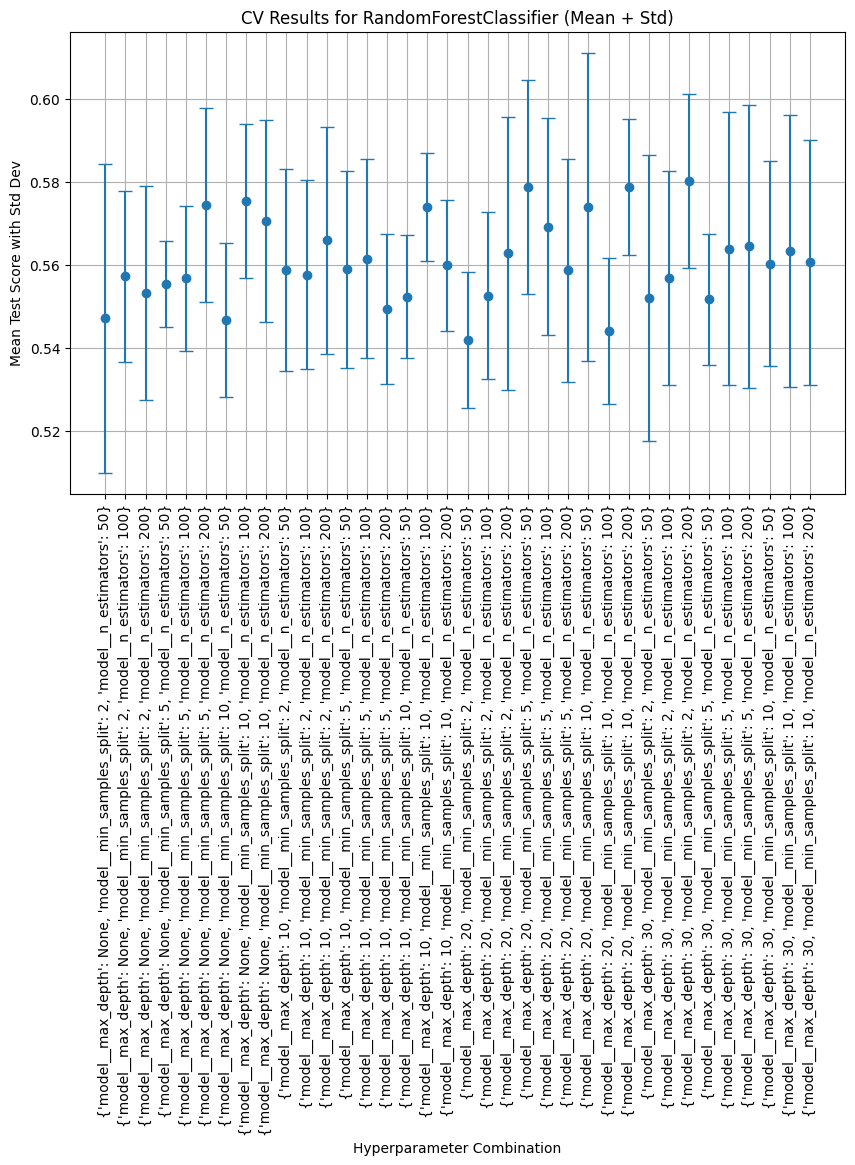

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


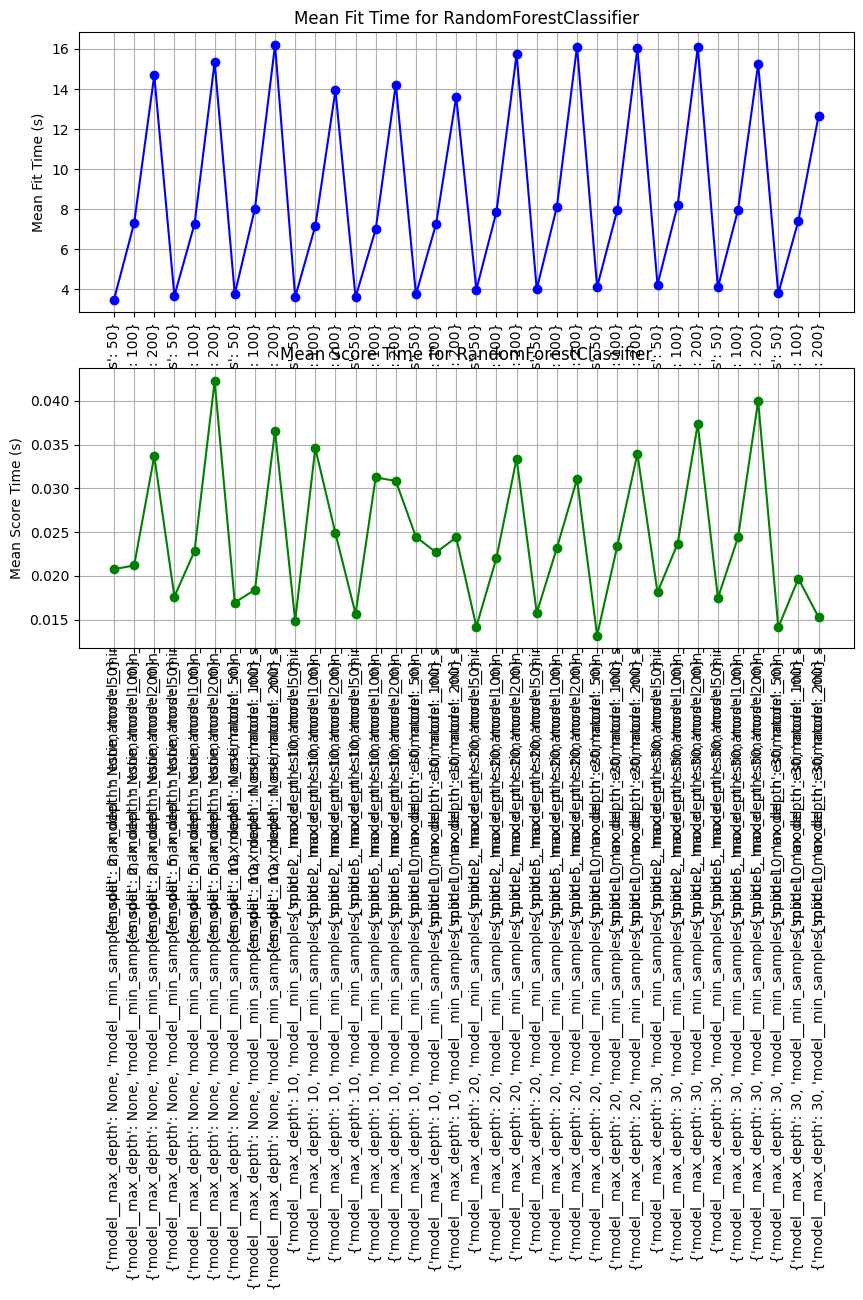

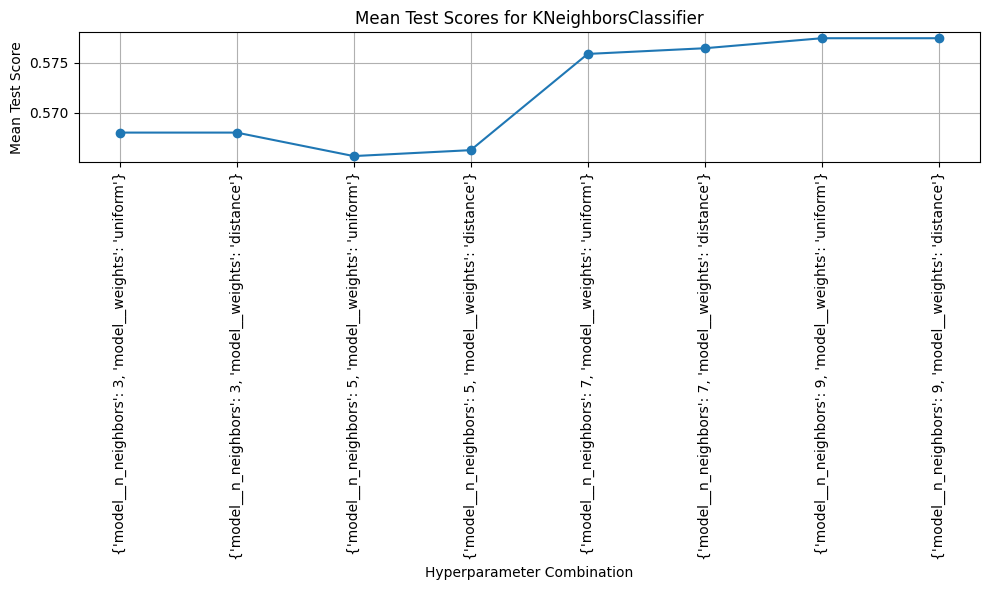

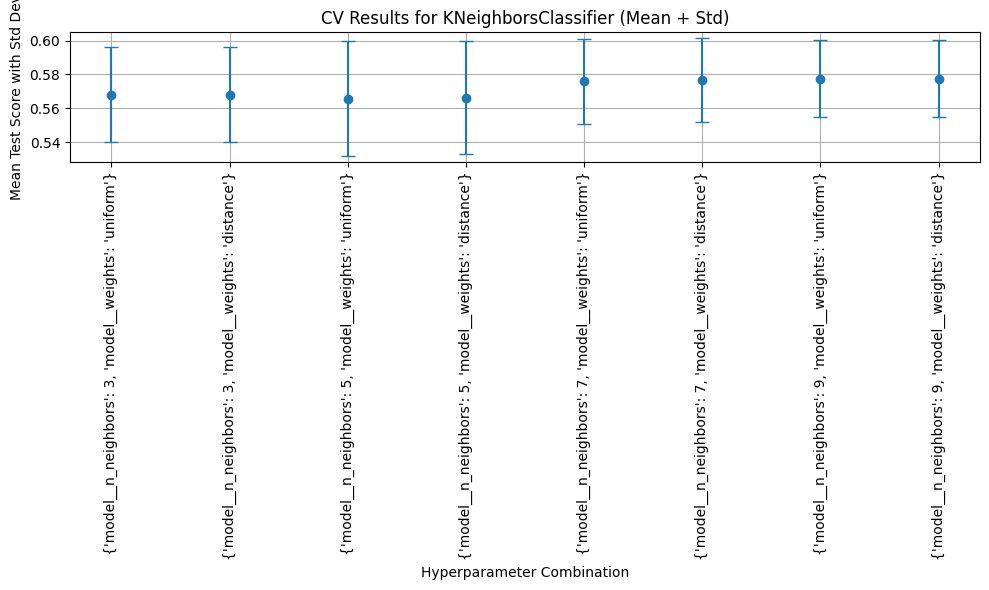

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


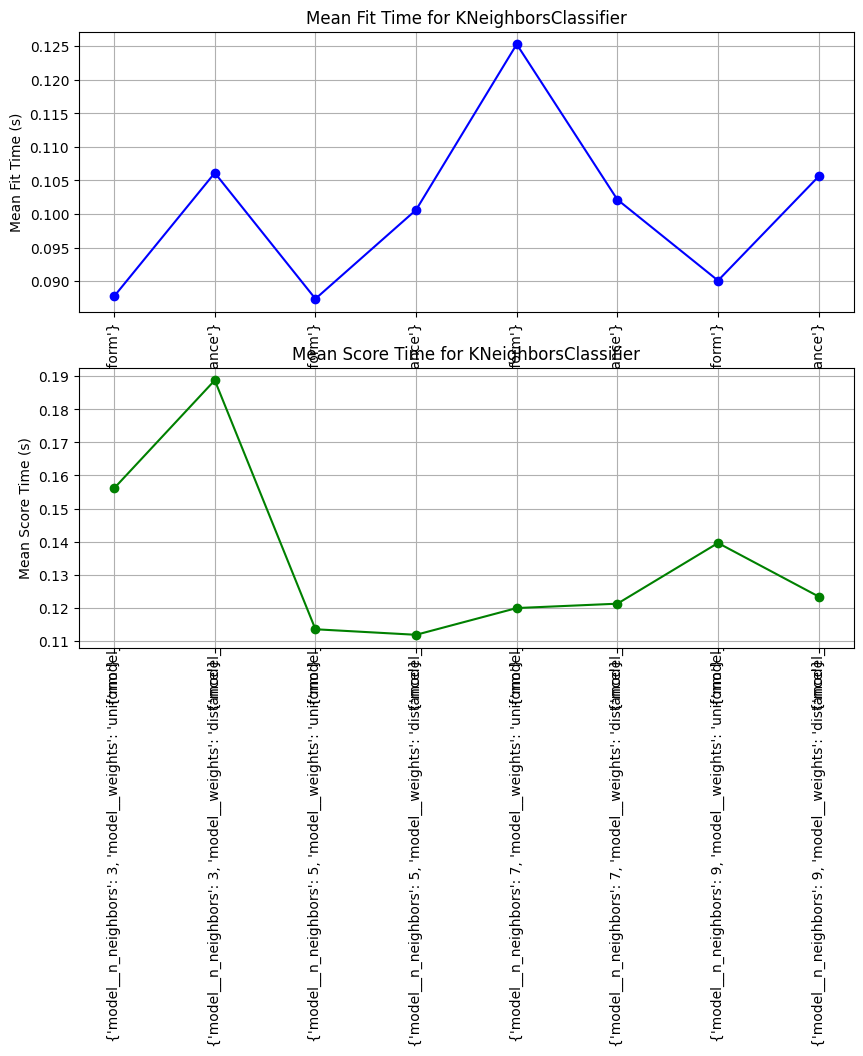

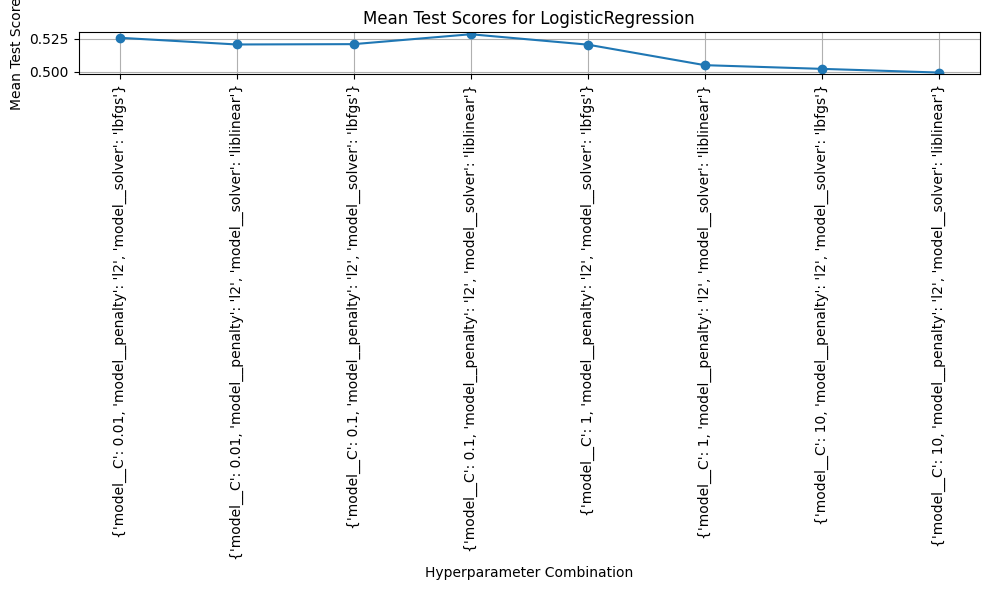

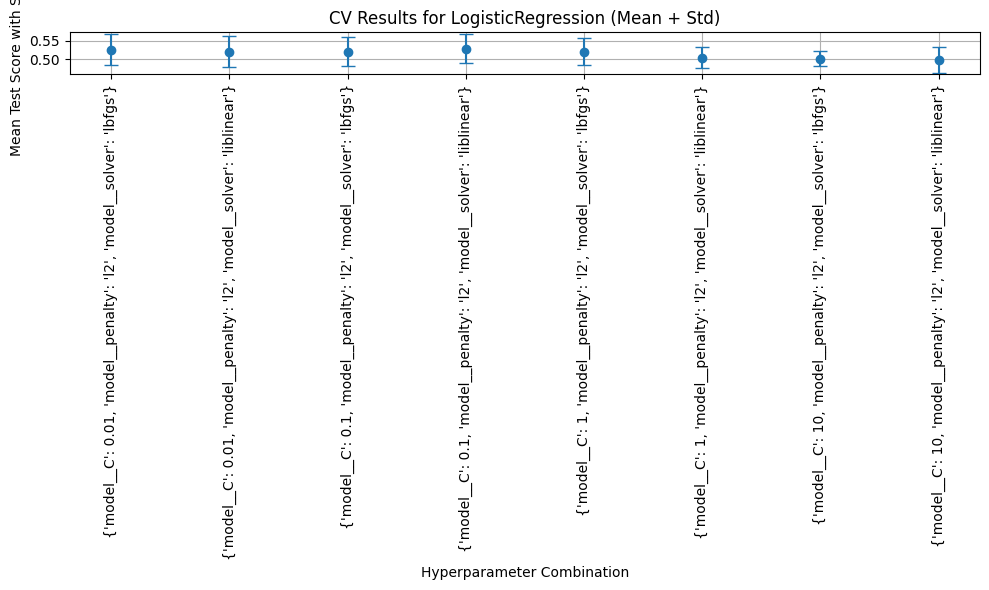

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


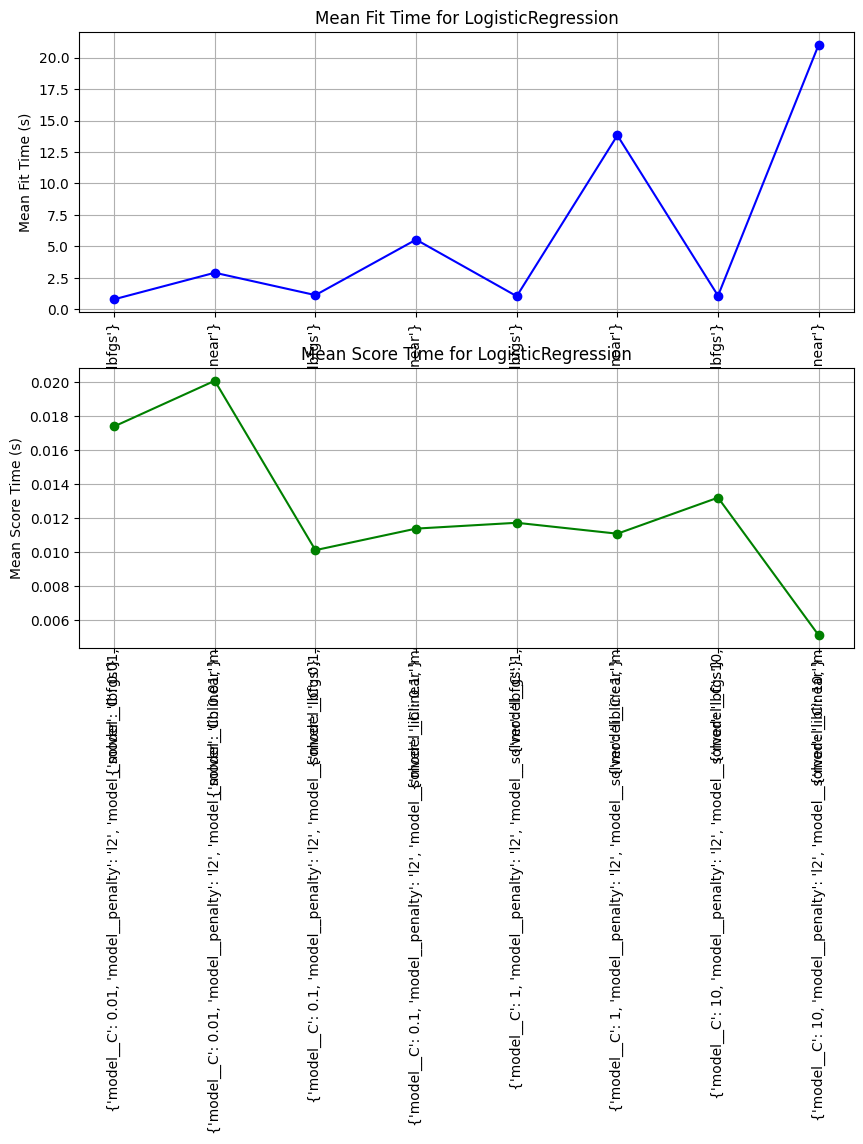

In [6]:
for model_result in attempt_1:
    model_name = model_result['model_name']
    cv_results = model_result['cv_results']  
    
    print("\n\n")
    VL.plot_test_scores(cv_results, model_name)
    VL.plot_cv_results(cv_results, model_name)
    VL.plot_fit_and_score_times(cv_results, model_name)



Model: SVC


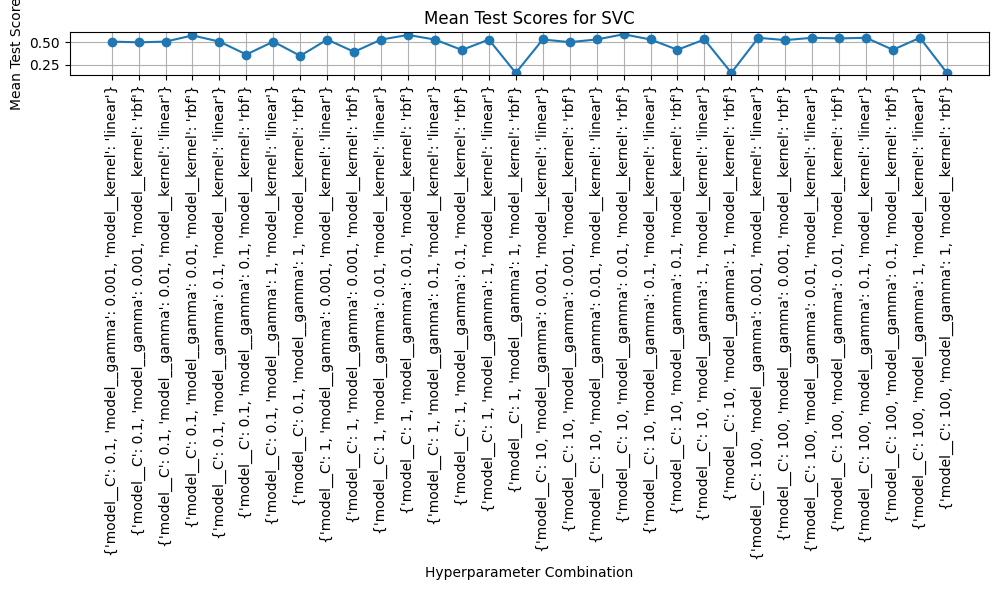

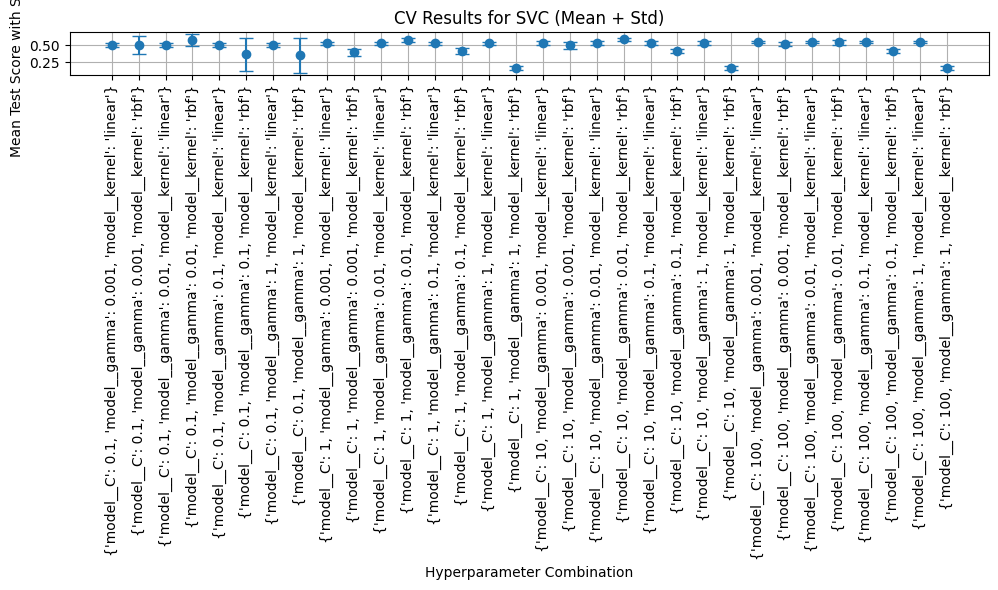

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


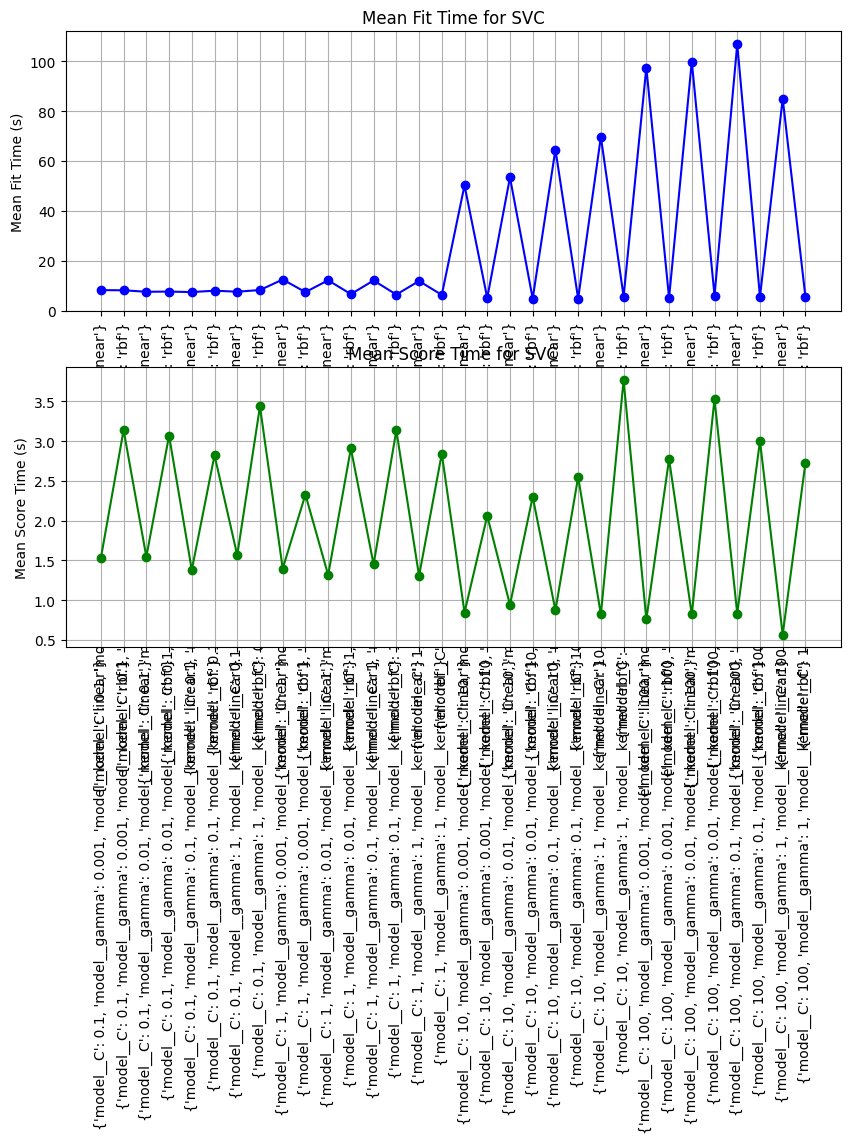

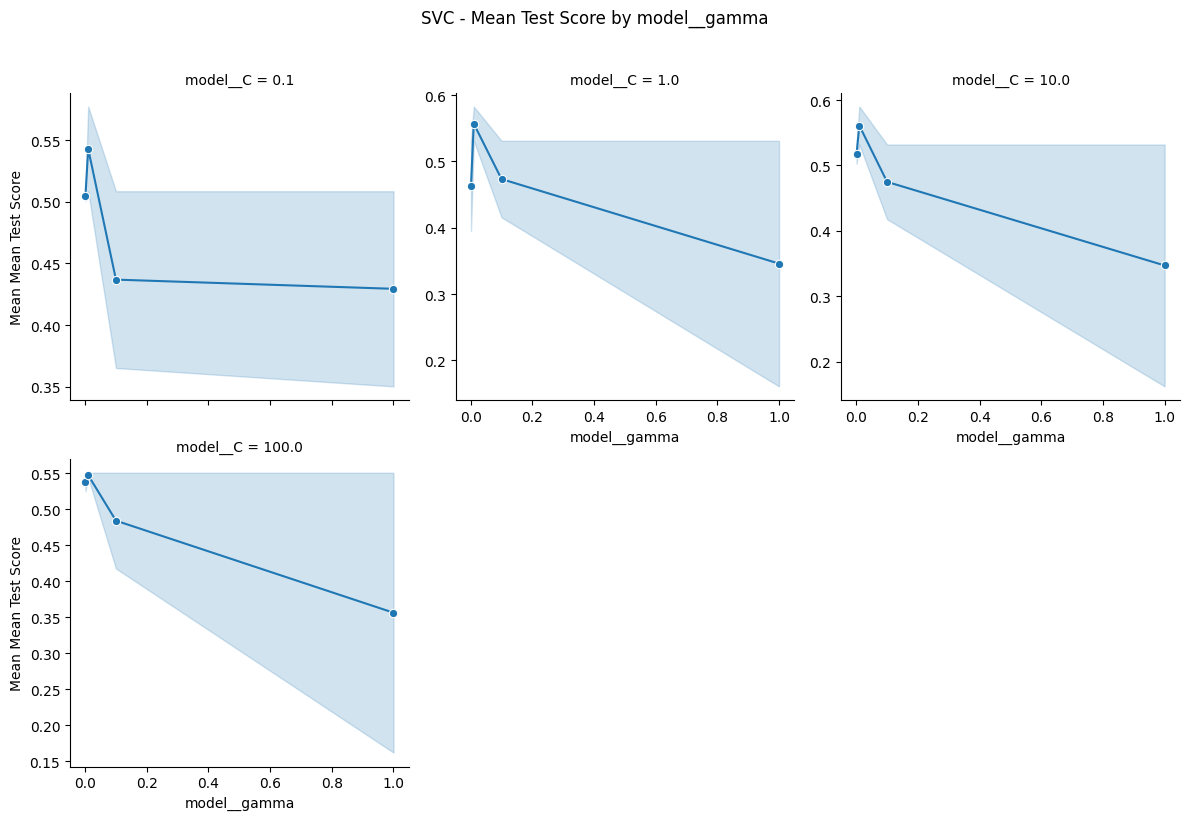

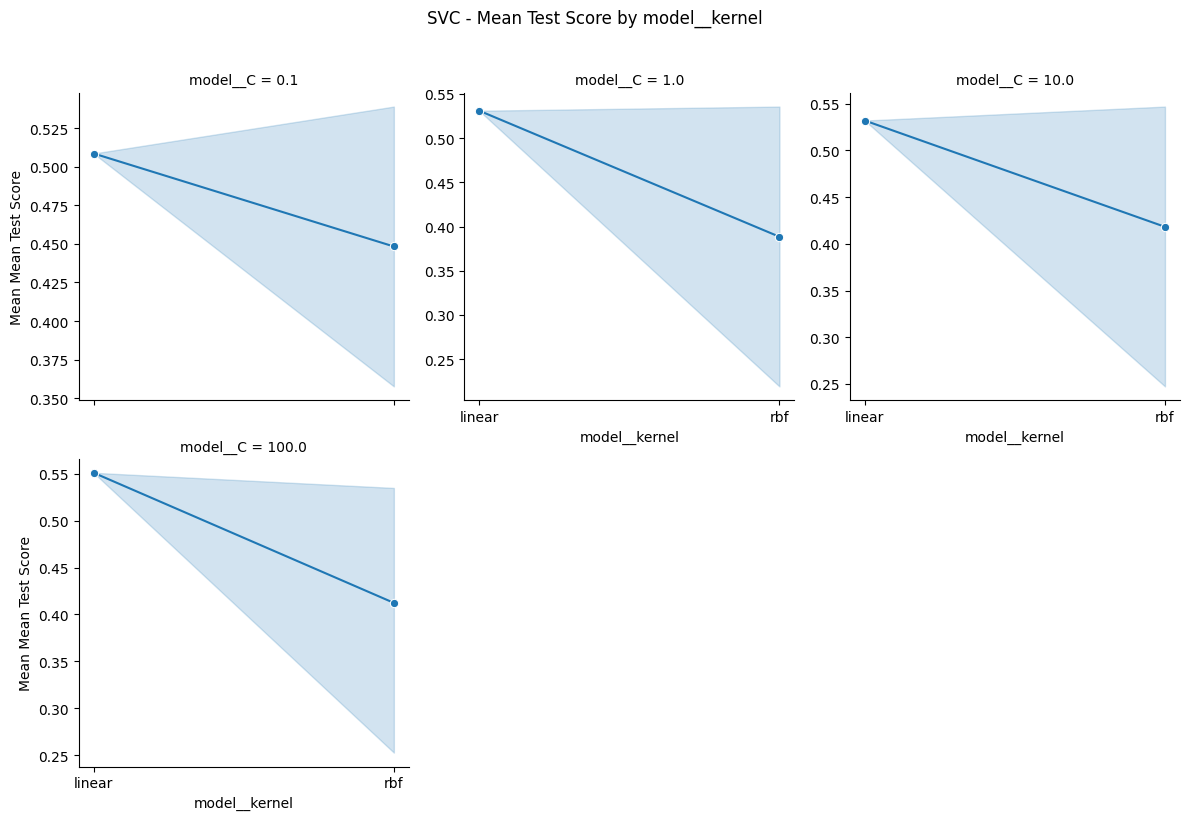



Model: RandomForestClassifier


/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:53: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


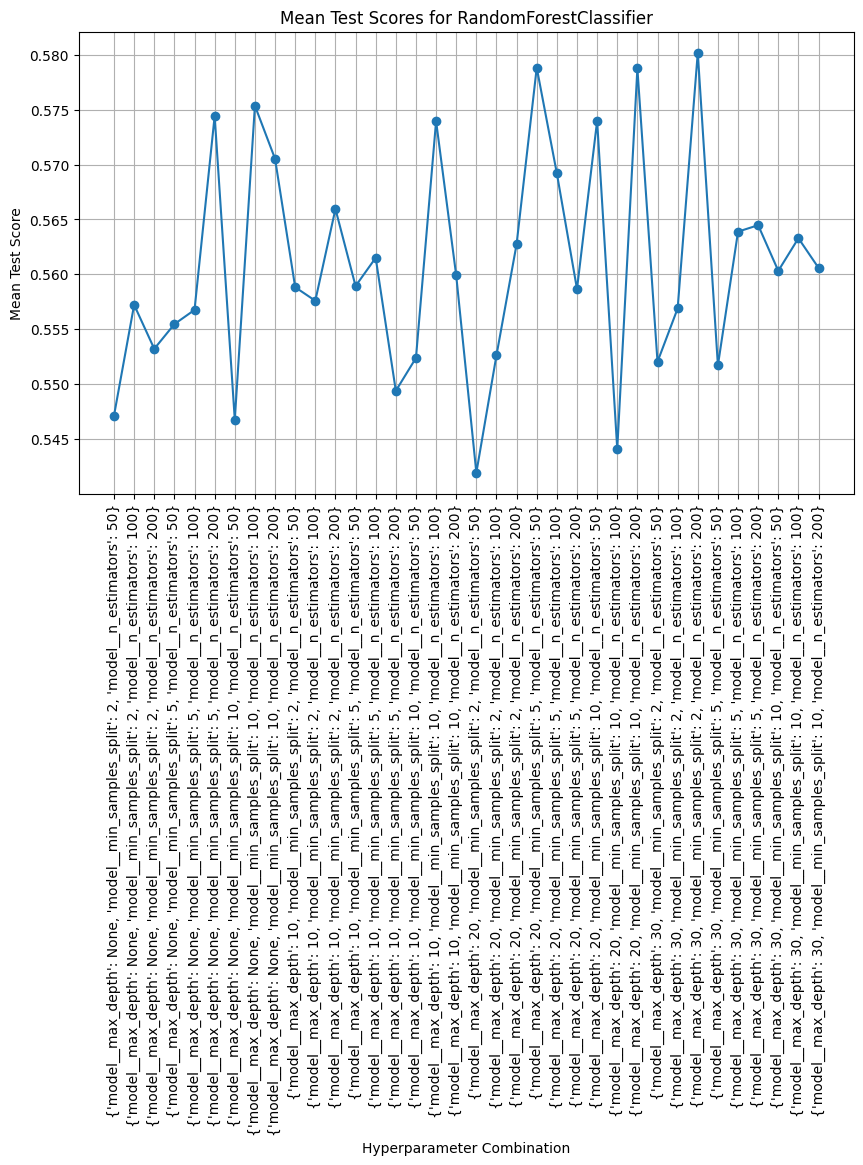

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:71: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


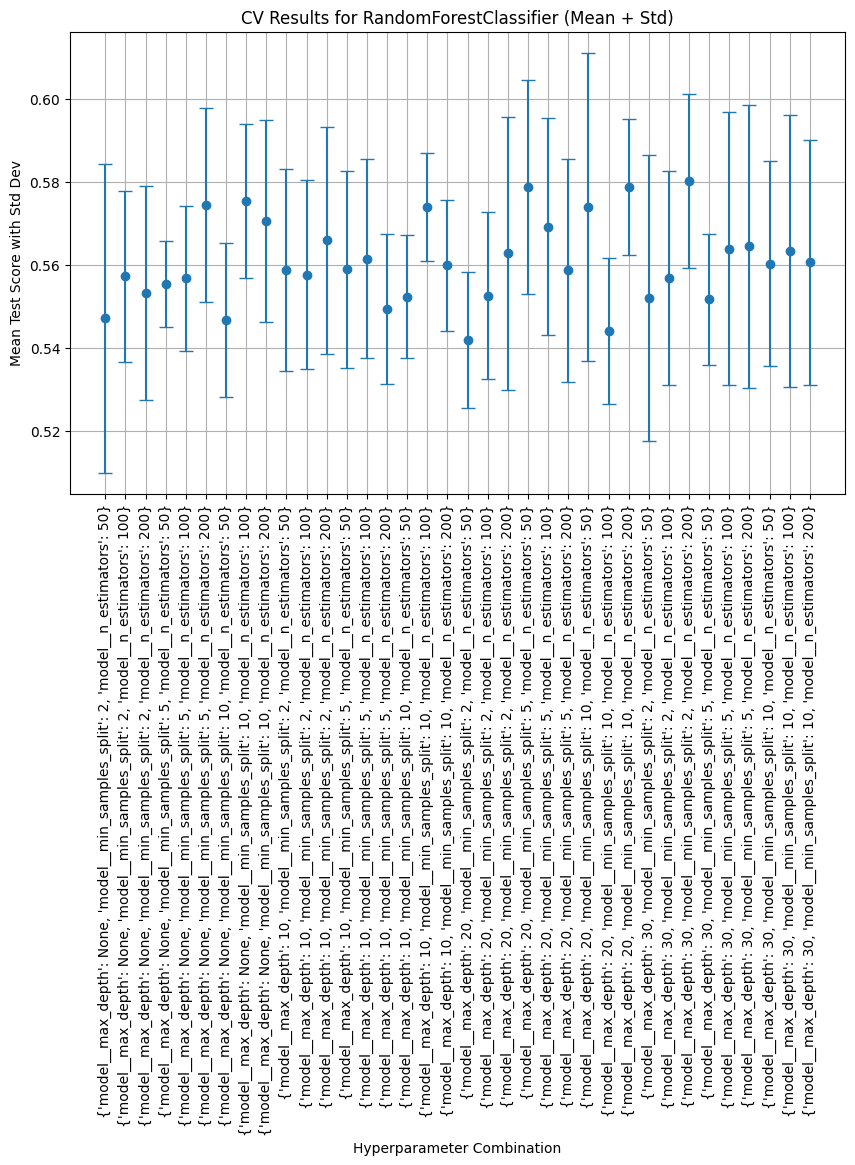

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


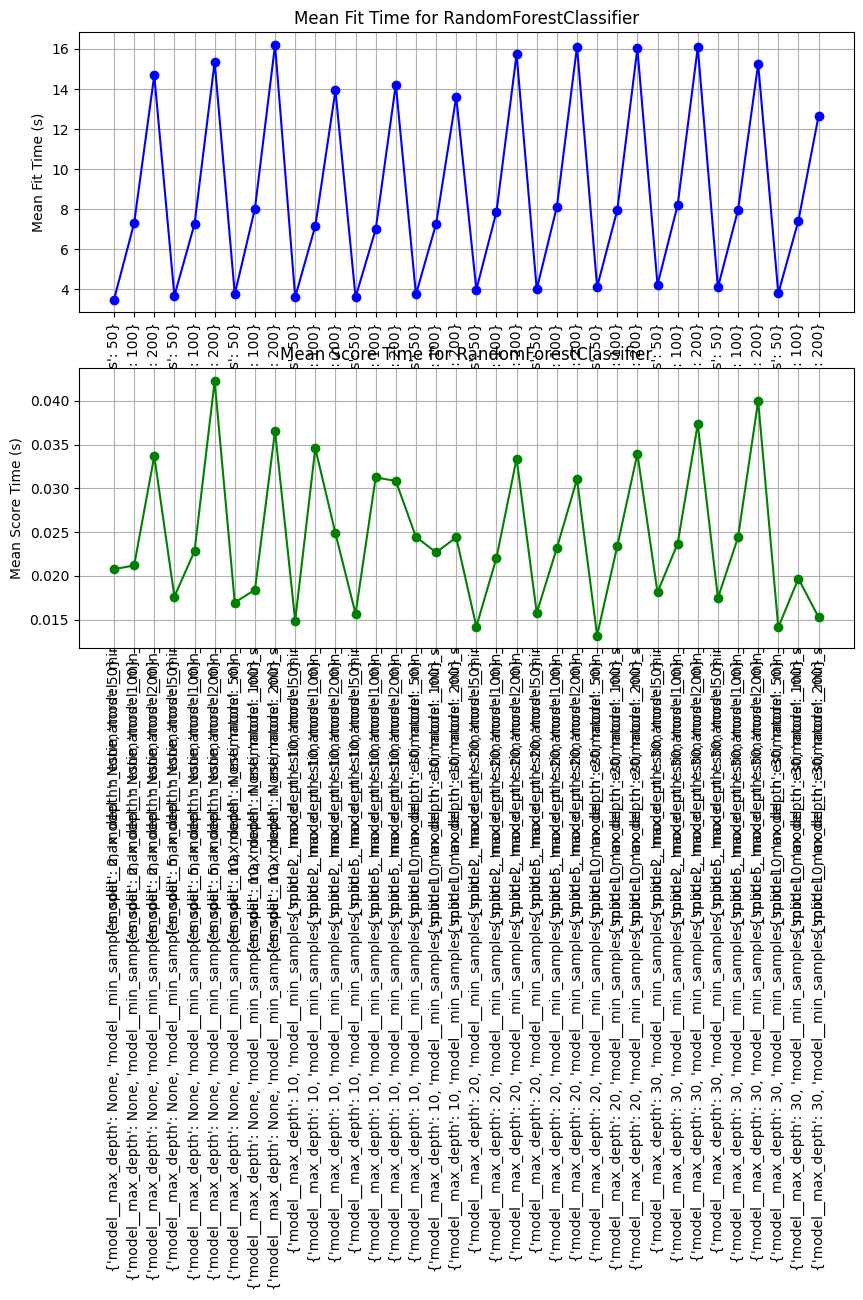

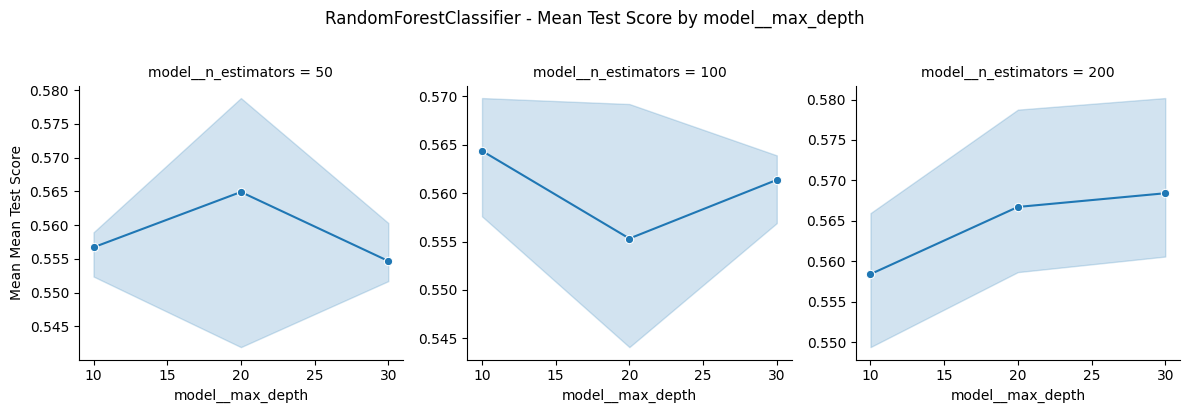

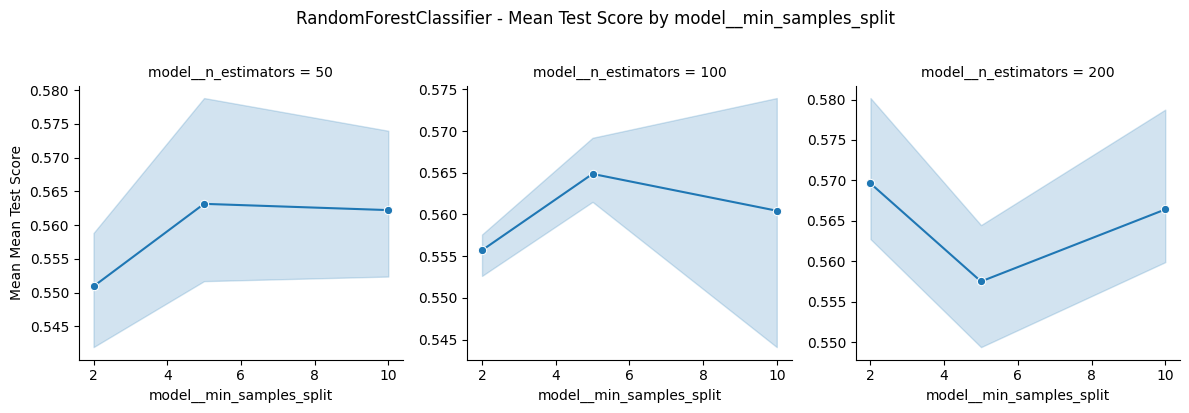



Model: KNeighborsClassifier


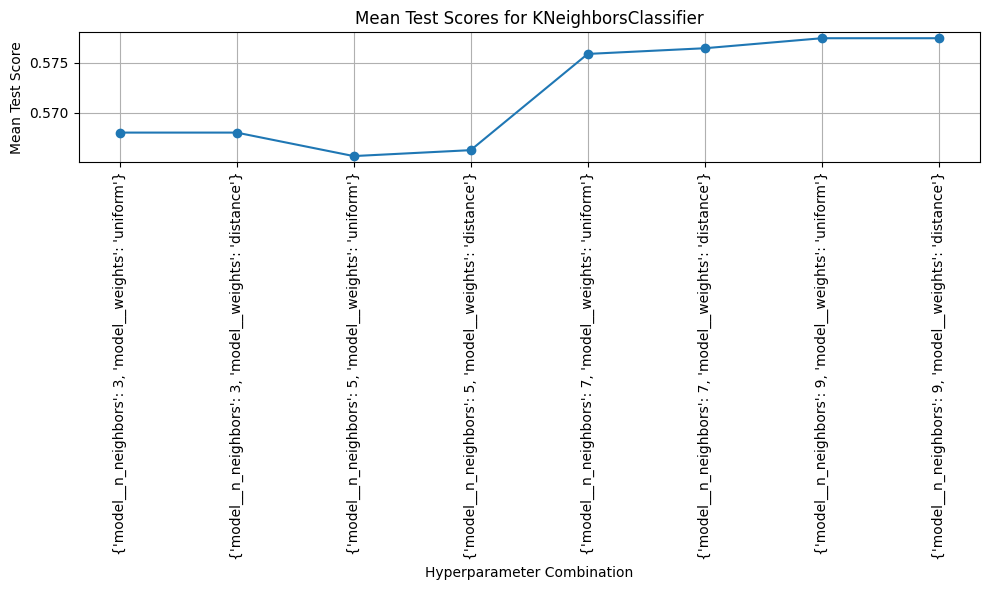

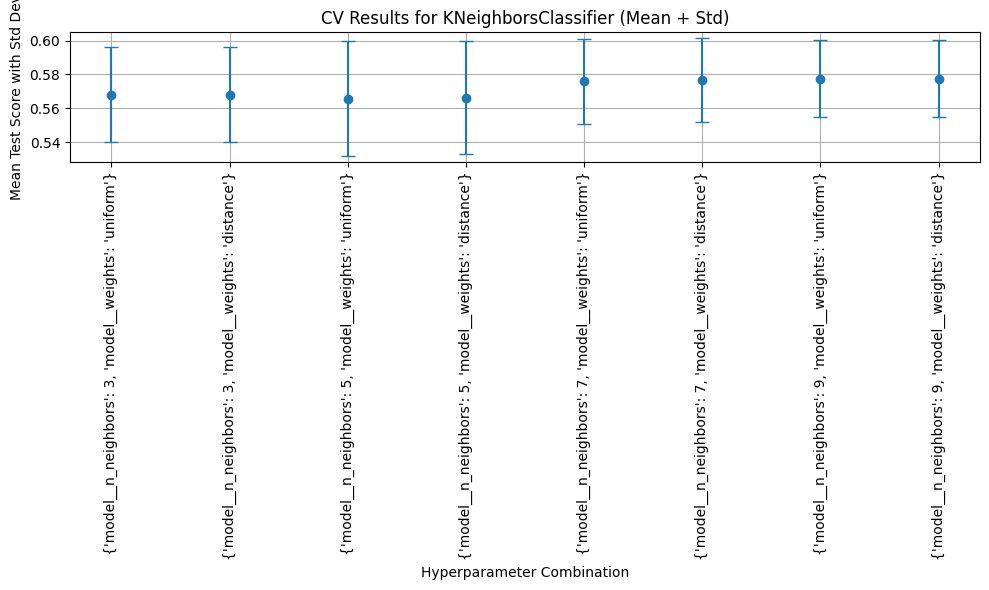

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


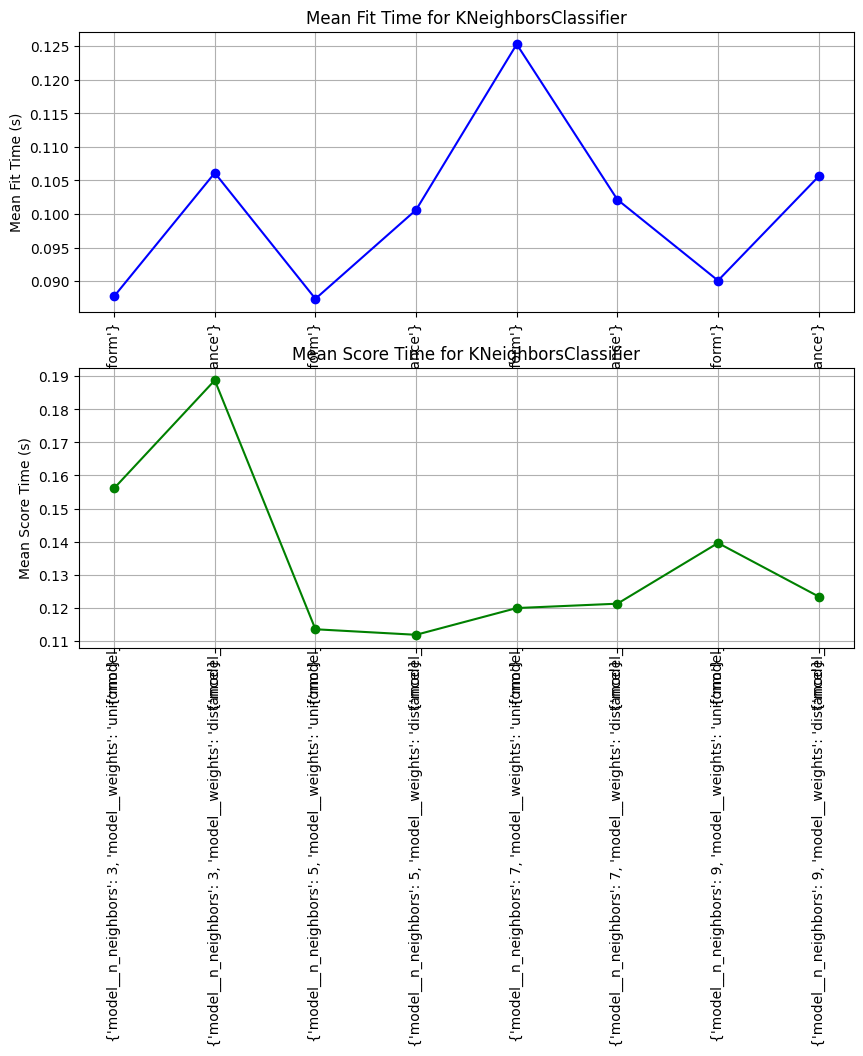

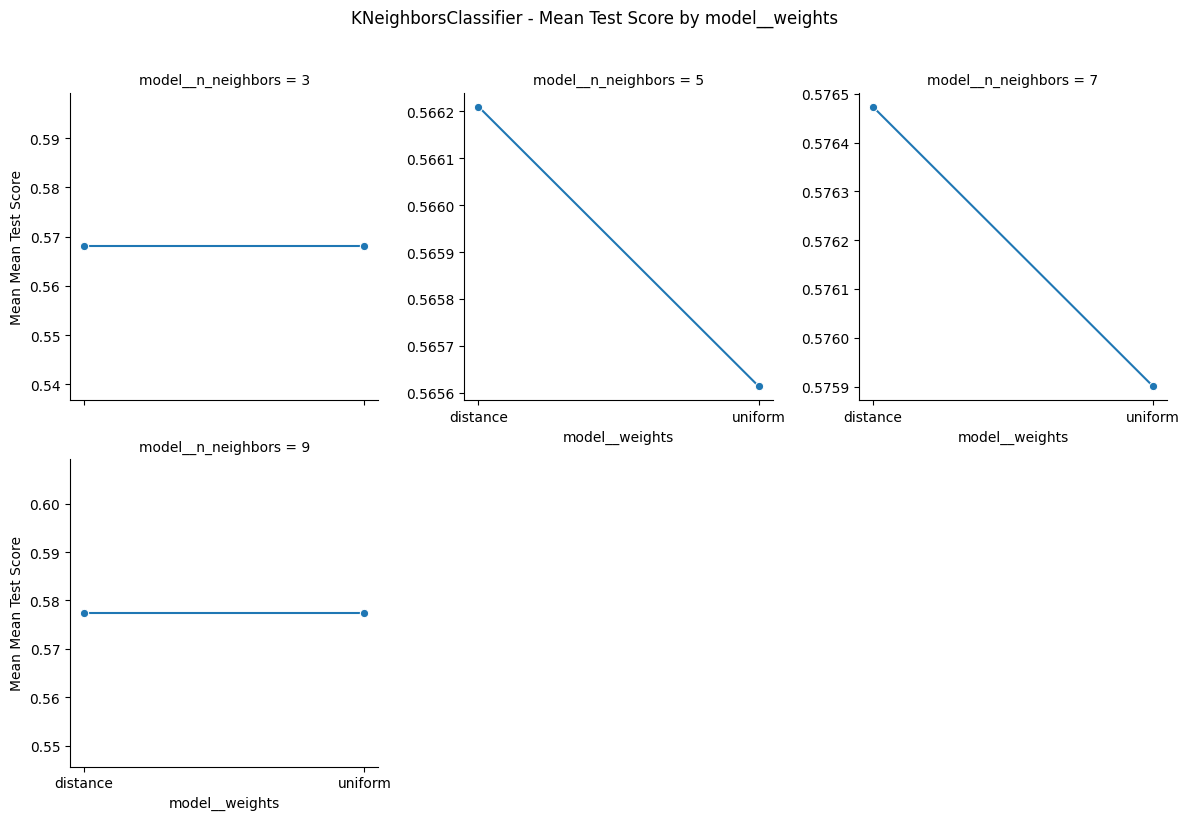



Model: LogisticRegression


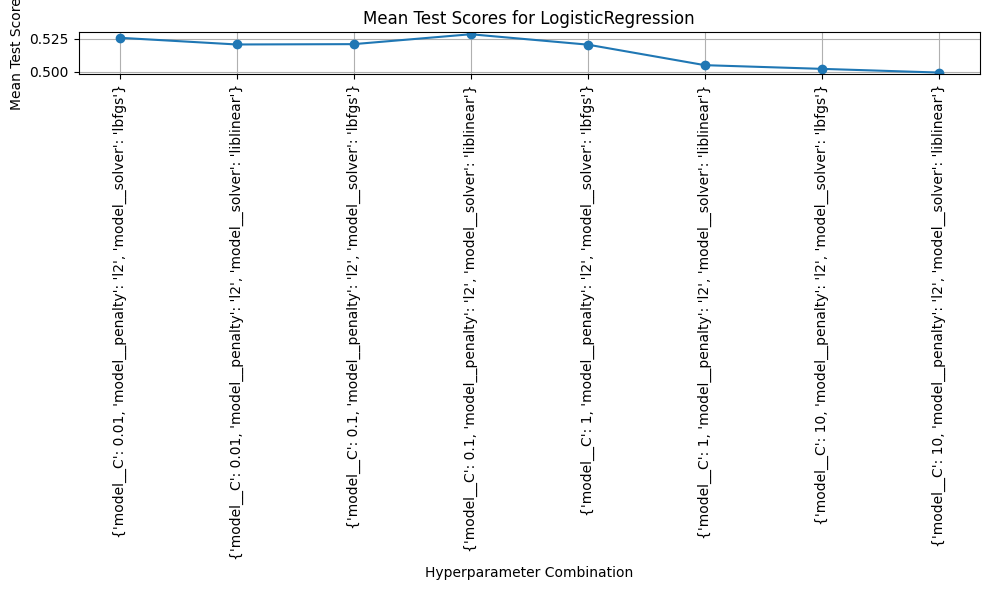

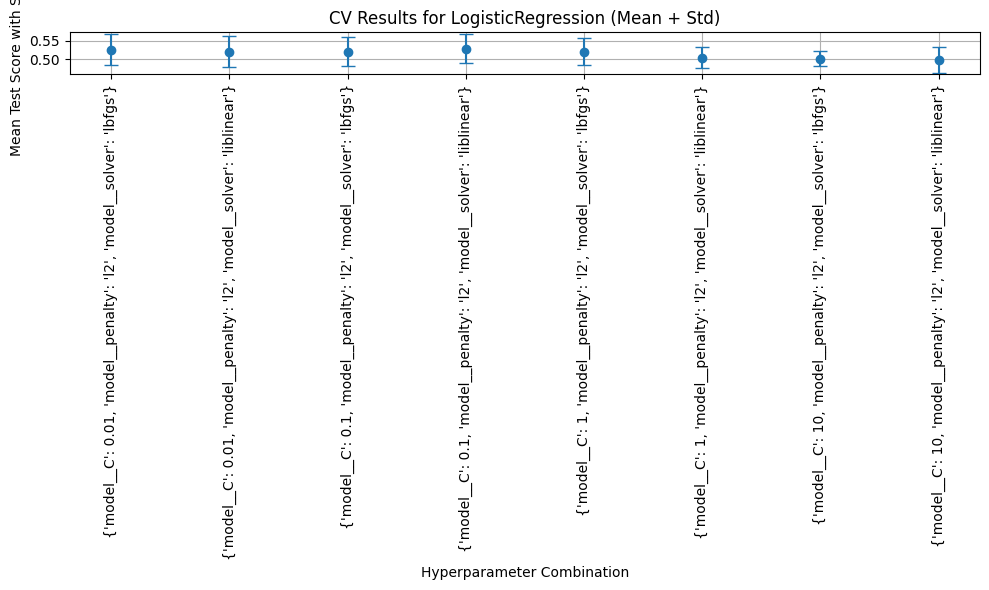

/Users/gsk/documents/neuron/lie-detector-ai/gs/visualisation_lib.py:98: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


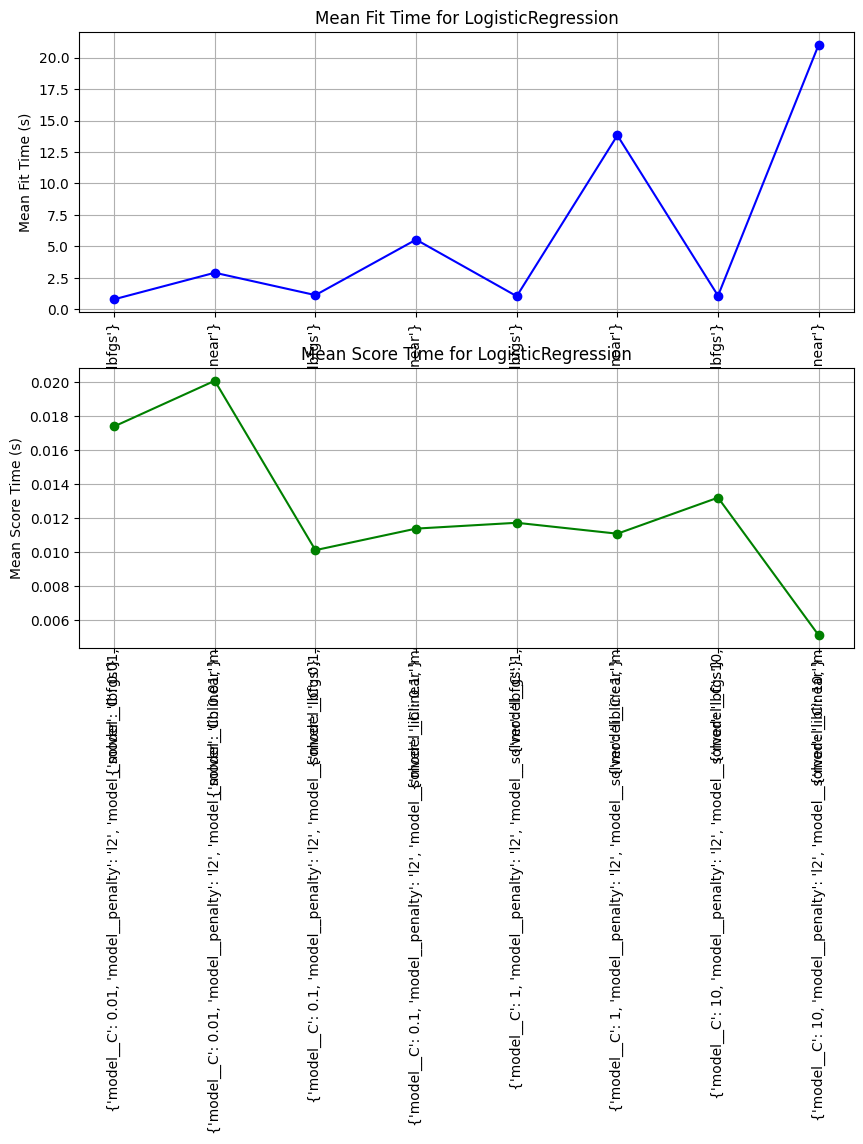

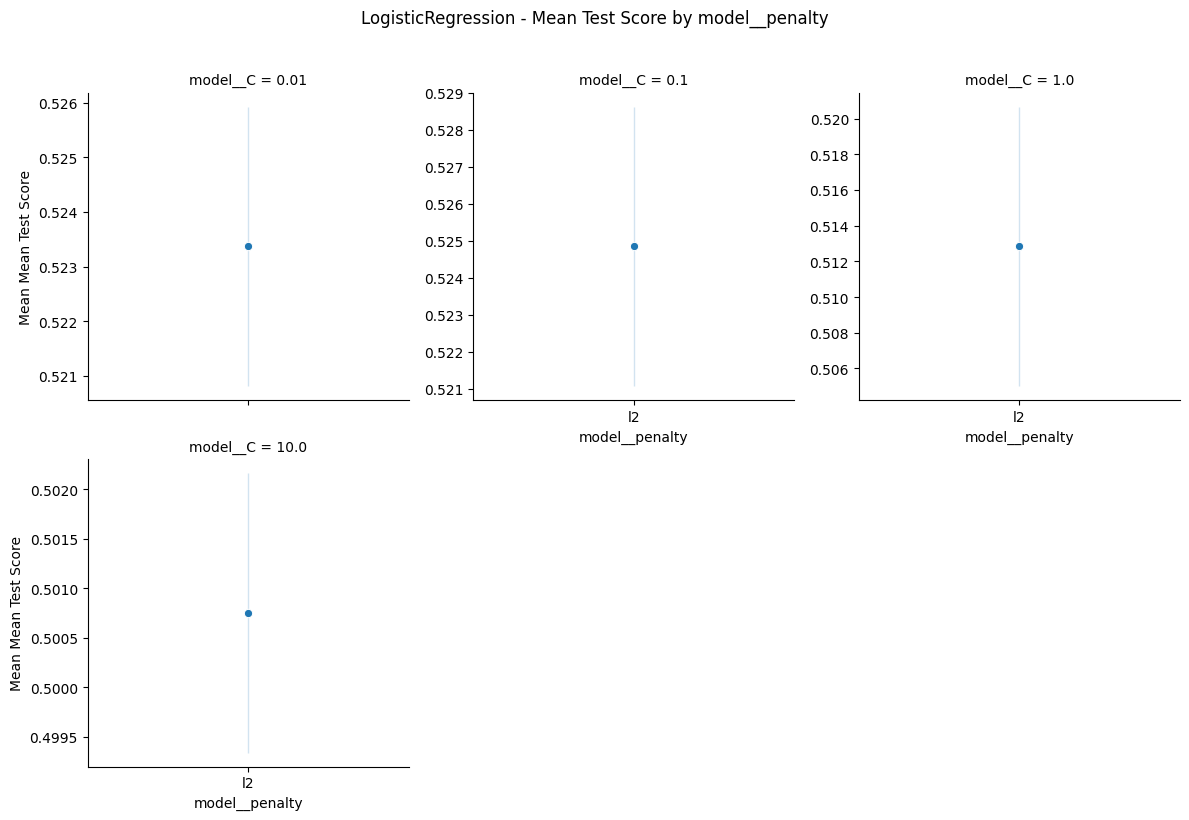

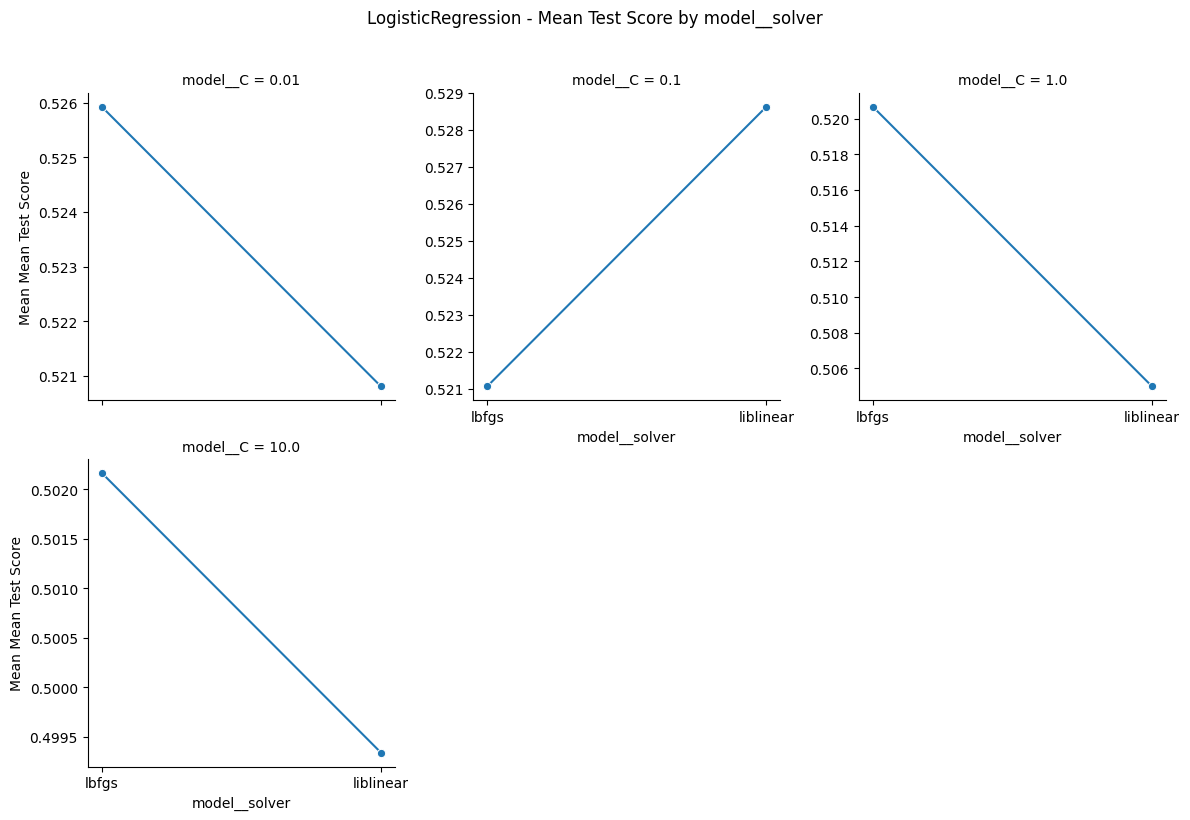

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

# Grouping function for multiple hyperparameters
def group_by_hyperparameters(cv_results, hyperparam_names):
    param_values = [{k: p[k] for k in hyperparam_names} for p in cv_results['params']]
    grouped_results = pd.DataFrame(param_values)
    grouped_results['mean_test_score'] = cv_results['mean_test_score']
    grouped_results['std_test_score'] = cv_results['std_test_score']
    grouped_results['mean_fit_time'] = cv_results['mean_fit_time']
    grouped_results['mean_score_time'] = cv_results['mean_score_time']

    grouped_summary = grouped_results.groupby(hyperparam_names).agg({
        'mean_test_score': ['mean', 'std'],
        'mean_fit_time': 'mean',
        'mean_score_time': 'mean'
    }).reset_index()
    
    grouped_summary.columns = hyperparam_names + ['mean_test_score', 'std_test_score', 'mean_fit_time', 'mean_score_time']
    
    return grouped_summary

# Faceted plotting function
def plot_facetgrid_metric(df, primary_hyperparam, x_hyperparam, metric, model_name, save_path=None):
    unique_values = df[primary_hyperparam].unique()
    n_cols = 3  # Adjust based on the number of unique values
    n_rows = int(np.ceil(len(unique_values) / n_cols))
    
    g = sns.FacetGrid(df, col=primary_hyperparam, col_wrap=n_cols, height=4, sharey=False)
    g.map_dataframe(sns.lineplot, x=x_hyperparam, y=metric, marker="o")
    g.set_axis_labels(x_hyperparam, f"Mean {metric.replace('_', ' ').title()}")
    g.set_titles(f"{primary_hyperparam} = {{col_name}}")
    g.fig.suptitle(f"{model_name} - {metric.replace('_', ' ').title()} by {x_hyperparam}", y=1.02)
    plt.tight_layout()
    plt.show()

# Define hyperparameters for each model
model_hyperparams = {
    'SVC': {
        'primary': 'model__C',
        'secondary': ['model__gamma', 'model__kernel']
    },
    'RandomForestClassifier': {
        'primary': 'model__n_estimators',
        'secondary': ['model__max_depth', 'model__min_samples_split']
    },
    'KNeighborsClassifier': {
        'primary': 'model__n_neighbors',
        'secondary': ['model__weights']
    },
    'LogisticRegression': {
        'primary': 'model__C',
        'secondary': ['model__penalty', 'model__solver']
    }
}

# Updated plotting loop
for model_result in attempt_1:
    model_name = model_result['model_name']
    cv_results = model_result['cv_results']
    
    print(f"\n\nModel: {model_name}")
    
    # 1. Plot existing test scores, CV results, and fit/score times
    VL.plot_test_scores(cv_results, model_name)
    VL.plot_cv_results(cv_results, model_name)
    VL.plot_fit_and_score_times(cv_results, model_name)
    
    # 2. Group by primary and plot
    if model_name in model_hyperparams:
        primary_hp = model_hyperparams[model_name]['primary']
        secondary_hps = model_hyperparams[model_name]['secondary']
        
        # Group by primary and secondary hyperparameters
        grouped_df = group_by_hyperparameters(cv_results, [primary_hp] + secondary_hps)
        
        # Iterate over secondary hyperparameters to create plots
        for sec_hp in secondary_hps:
            plot_facetgrid_metric(
                df=grouped_df,
                primary_hyperparam=primary_hp,
                x_hyperparam=sec_hp,
                metric='mean_test_score',
                model_name=model_name
            )
    else:
        print(f"No hyperparameter configuration defined for model: {model_name}")

